# Introduction to Error Propagation
This is another short little introduction to get you acquianted with the idea that data with errors actually designate probability distributions. Those distributions then evolve if further calculations are performed with them. The study of this phenomenon is called "error propagation." 

There are ways to estimate the magnitude of errors as they propagate through calculations using calculus. However, they are only estimations which utilize the tangent line approximation of a function. To get a better handle on how errors propagate through calculations, we use our ability to generate distributions using numpy utilities.

First (as is often the case) we import some useful packages that other really smart people wrote for us :)

In [1]:
# Import some useful python packages
import numpy as np # for math
import matplotlib.pyplot as plt # for plotting capabilities
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Now we will generate random numbers "normally" distributed around some mean value. This means that the probability of drawing a number will be 

$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{\left(x-x_0\right)^2}{2\sigma^2}\right]$

where $x_0$ is the mean of the distribution and $\sigma$ is the standard deviation.

In [2]:
# mean of 5, standard deviation of 0.2, 100000 elements
d1 = np.random.normal(5,0.2,100000) 

So, what is d1? ... it's a bunch of numbers!

In [3]:
print(d1)

[4.89327443 5.17702839 4.67825187 ... 4.8155307  5.20550539 5.36726469]


What does the histogram of those numbers look like?

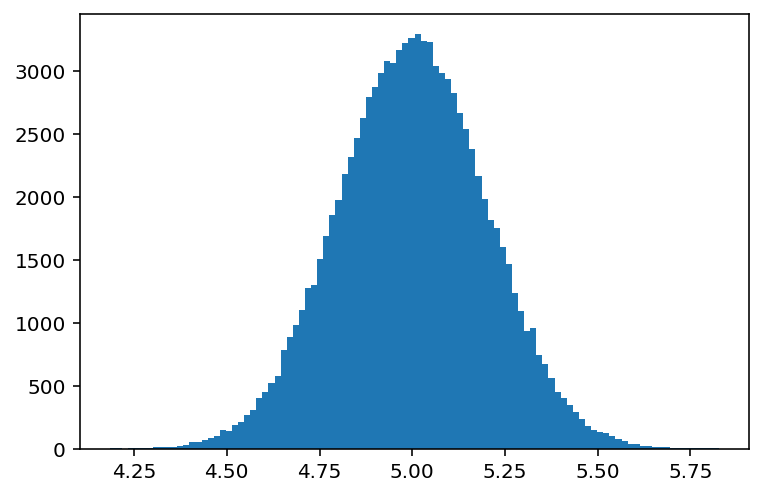

In [4]:
hist = plt.hist(d1,bins=100)

How does that compare with the normal function?

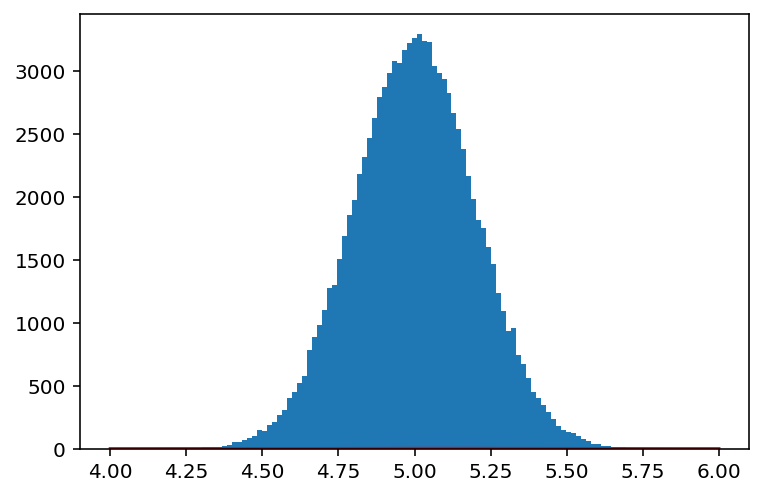

In [5]:
hist = plt.hist(d1,bins=100)
x = np.linspace(4,6,1000)
p = 1/(np.sqrt(2*np.pi)*0.2)*np.exp(-(x-5)**2/(2*0.2**2))
plt.plot(x,p,'r-')

Perty darn good! Now let's create another distribution.

In [6]:
# mean of 3, standard deviation of 0.15, 100000 elements
d2 = np.random.normal(3,0.15,100000)

Now let's plot them both on the same axes.

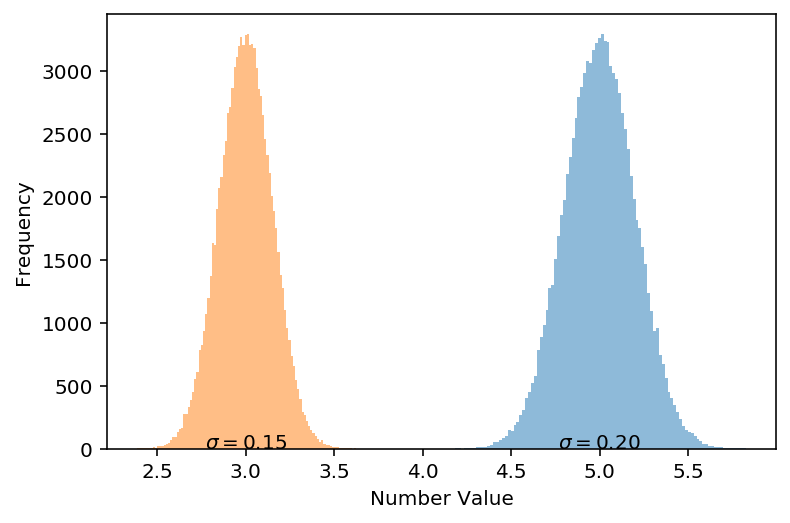

In [7]:
# Plot a histogram of d1 values
hist = plt.hist(d1,bins=100,alpha=0.5) #my. version of python doesn't have the boolean kwargs desity
# Annotate the plot
plt.annotate(r'$\sigma = 0.15$',(3,2.8),ha='center')

# Plot a histogram of d2 values
plt.hist(d2,alpha=0.5,bins=100)
# Annotate the plot
plt.annotate(r'$\sigma = 0.20$',(5,2.3),ha='center')

# Label the axes
plt.xlabel('Number Value')
plt.ylabel('Frequency');

Now let's see what happens when you add these two "numbers"

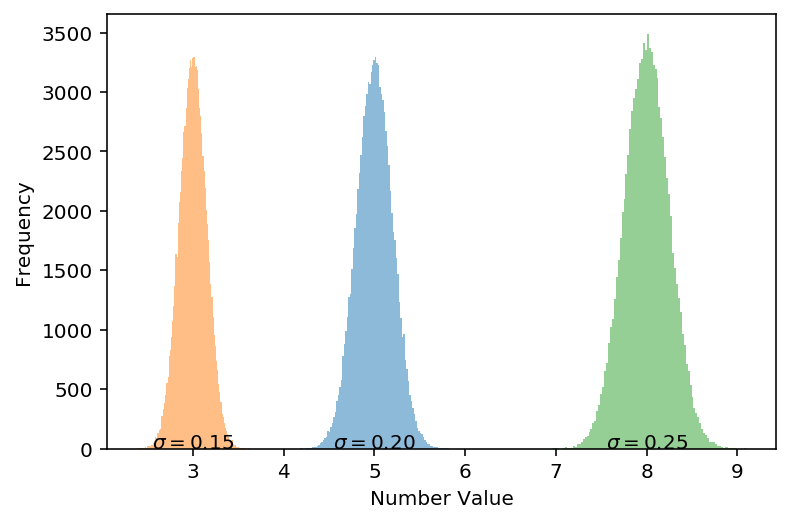

In [8]:
# Plot first distribution (i.e. "number")
hist = plt.hist(d1,bins=100,alpha=0.5)
# Annotate the plot
plt.annotate(r'$\sigma = 0.15$',(3,2.8),ha='center')

# Plot a histogram of d2 values
plt.hist(d2,bins=100,alpha=0.5)
# Annotate the plot
plt.annotate(r'$\sigma = 0.20$',(5,2.3),ha='center')

# Label the axes
plt.xlabel('Number Value')
plt.ylabel('Frequency')

# What happens when you add the two distributions?
d3 = d2+d1
# Plot the resultant distribution
plt.hist(d3,bins=100,alpha=0.5)
# What is the real standard deviation?
std3r = np.std(d3)
# What do we expect?
std3c = np.sqrt(0.2**2+0.1**2)
# Annotate the plot
plt.annotate(r'$\sigma = %.2f$' % std3r,(8,2.0),ha='center');

Now you can experiment with other mathematical operations

0.9593657971063053 0.9605198982701457


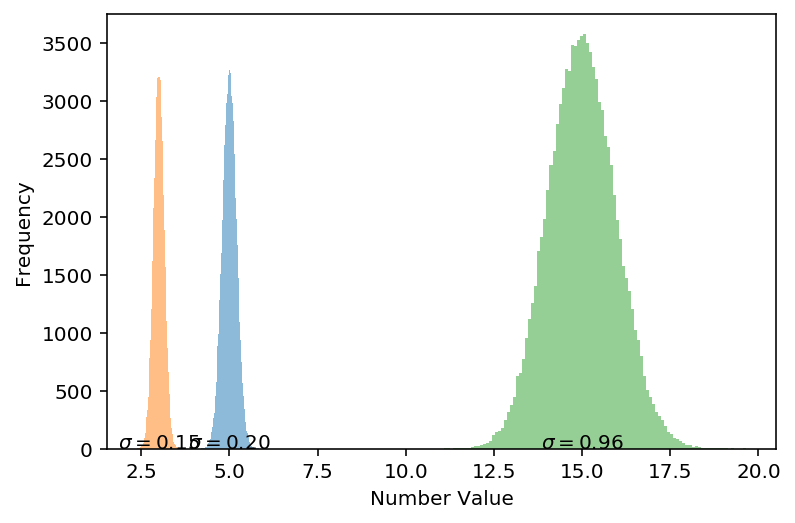

In [9]:
# Plot the first "number"
hist = plt.hist(d1,bins=100,alpha=0.5)
# Annotate the plot
plt.annotate(r'$\sigma = 0.15$',(3,2.8),ha='center')

# Plot a histogram of d2 values
plt.hist(d2,bins=100,alpha=0.5)
# Annotate the plot
plt.annotate(r'$\sigma = 0.20$',(5,2.3),ha='center')

# Label the axes
plt.xlabel('Number Value')
plt.ylabel('Frequency')


# What happens when we multiply the two distributions?
d4 = d1*d2
# Plot the resultant distribution
plt.hist(d4,bins=100,alpha=0.5)
# What is the real standard deviation?
std4r = np.std(d4)
# What do we expect?
std4c = np.sqrt((0.2*np.mean(d2))**2 + (0.15*np.mean(d1))**2)
# Annotate plot
plt.annotate(r'$\sigma = %.2f$' % std4r,(15,0.6),ha='center')
print(std4r, std4c)

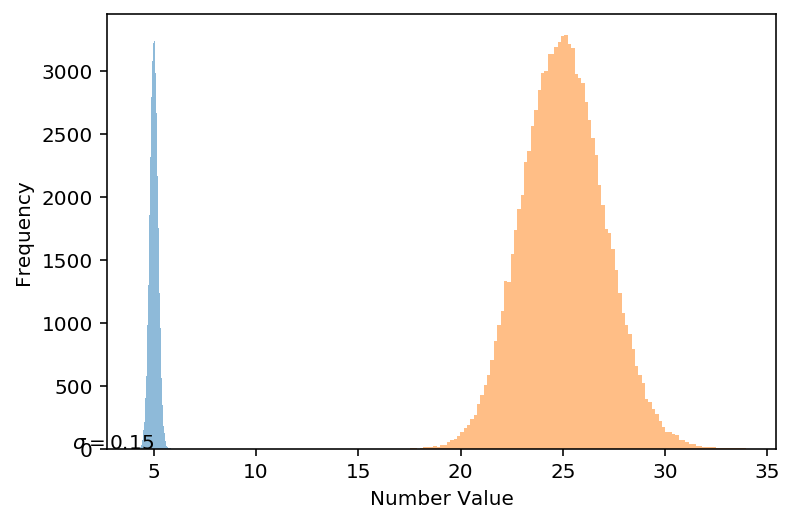

In [10]:
hist = plt.hist(d1,bins=100,alpha=0.5)
# Annotate the plot
plt.annotate(r'$\sigma = 0.15$',(3,2.8),ha='center')

# Label the axes
plt.xlabel('Number Value')
plt.ylabel('Frequency')

d5 = d1**2.0
plt.hist(d5,bins=100,alpha=0.5)
std5r = np.std(d5)
std5c = 4.0*np.mean(d1)**3*0.2

## Homework
Find a familiar equation from science, math or statistics that contains at least 3 variables. Here are a couple that you may use, but best to find one that you are somewhat interested in.
$$F_g = G\frac{m_1m_2}{r^2} \quad\quad v_{orb} = \sqrt{\frac{GM}{r}} \quad\quad d = \frac{1}{2}at^2+v_0t+d_0 $$
Then follow the directions below to gain some experience propagating error
1. Choose 2 variables in your equatio to have errors and the others can have no error.
2. Generate distributions that represent the values with errors, and specify the values of the other variables.
3. Plot up on separate axes a histogram for each of the variables with error.
4. Perform the calculation that your equation requires. 
5. Plot the histogram of the final answer. 
6. Go back and change the errors of the variables to investigate how the errors propagate to your final answer. 
7. Make a final plot of your final answer that has labeled axes and a title. 
8. Save and upload your notebook to the repo.

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 1.700e+01,
        1.200e+01, 1.700e+01, 2.200e+01, 3.400e+01, 4.200e+01, 6.700e+01,
        7.200e+01, 9.300e+01, 1.090e+02, 1.530e+02, 1.920e+02, 2.450e+02,
        2.910e+02, 3.870e+02, 4.390e+02, 5.160e+02, 6.270e+02, 7.350e+02,
        8.440e+02, 1.011e+03, 1.174e+03, 1.302e+03, 1.430e+03, 1.632e+03,
        1.889e+03, 2.015e+03, 2.282e+03, 2.448e+03, 2.632e+03, 2.864e+03,
        2.998e+03, 3.220e+03, 3.403e+03, 3.382e+03, 3.406e+03, 3.579e+03,
        3.569e+03, 3.628e+03, 3.611e+03, 3.667e+03, 3.425e+03, 3.268e+03,
        3.209e+03, 3.130e+03, 2.908e+03, 2.737e+03, 2.568e+03, 2.325e+03,
        2.047e+03, 1.922e+03, 1.721e+03, 1.583e+03, 1.437e+03, 1.213e+03,
        1.042e+03, 9.180e+02, 8.150e+02, 7.250e+02, 5.730e+02, 4.420e+02,
        3.920e+02, 3.160e+02, 2.630e+02, 2.060e+02, 1.850e+02, 1.100e+02,
        1.070e+02, 7.200e+01, 8.100e+0

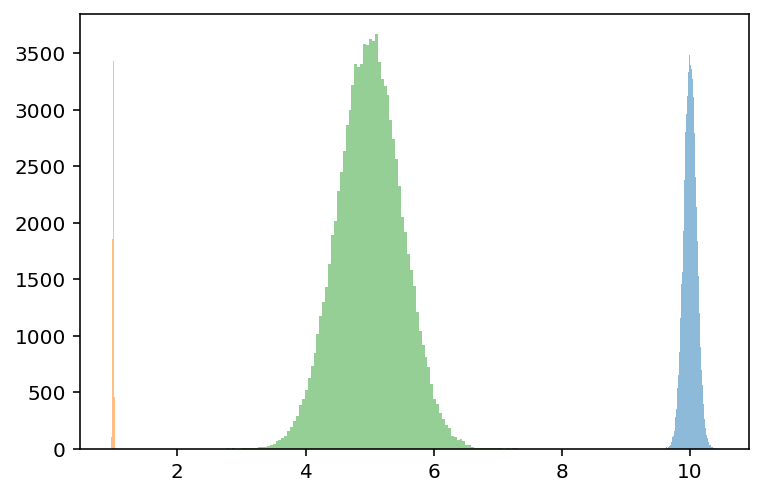

In [11]:
mass = np.random.normal(10,0.1,100000)
radius = np.random.normal(1,0.01,100000)
force = np.random.normal(5,0.5,100000)
torque = radius * force
inertia = (2.0/5.0) * mass * (radius**2)
hist = plt.hist(mass,bins=100,alpha=0.5)
plt.hist(radius,bins=100,alpha=0.5)
plt.hist(force,bins=100,alpha=0.5)

(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 4.000e+00, 7.000e+00, 3.000e+00, 1.100e+01,
        1.000e+01, 1.800e+01, 1.700e+01, 2.700e+01, 3.600e+01, 4.700e+01,
        8.900e+01, 8.900e+01, 1.060e+02, 1.460e+02, 1.720e+02, 2.260e+02,
        2.780e+02, 3.610e+02, 4.210e+02, 5.300e+02, 5.790e+02, 7.050e+02,
        8.560e+02, 9.820e+02, 1.123e+03, 1.349e+03, 1.456e+03, 1.625e+03,
        1.824e+03, 2.039e+03, 2.286e+03, 2.480e+03, 2.664e+03, 2.825e+03,
        2.945e+03, 3.279e+03, 3.329e+03, 3.359e+03, 3.498e+03, 3.482e+03,
        3.578e+03, 3.687e+03, 3.544e+03, 3.594e+03, 3.548e+03, 3.348e+03,
        3.213e+03, 3.191e+03, 2.850e+03, 2.739e+03, 2.545e+03, 2.328e+03,
        2.164e+03, 1.960e+03, 1.727e+03, 1.570e+03, 1.361e+03, 1.212e+03,
        1.113e+03, 9.220e+02, 8.150e+02, 6.670e+02, 5.900e+02, 4.830e+02,
        4.040e+02, 3.270e+02, 2.550e+02, 2.140e+02, 1.830e+02, 1.180e+02,
        1.020e+02, 8.300e+01, 6.500e+0

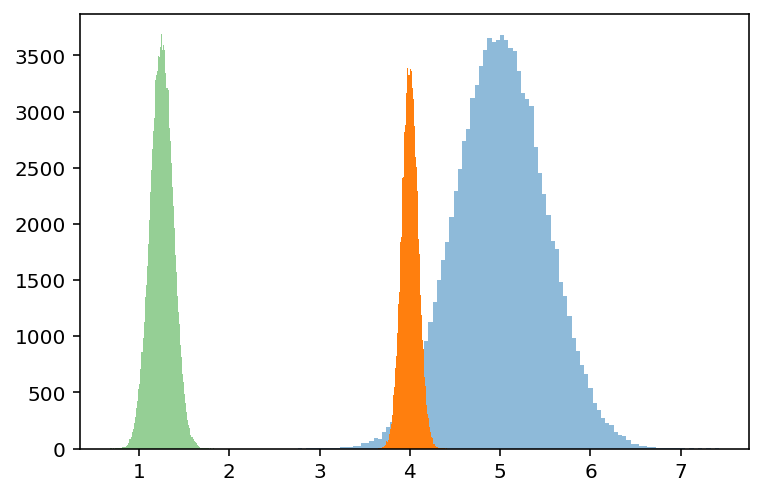

In [12]:
hist = plt.hist(torque,bins=100,alpha=0.5)
plt.hist(inertia,bins=100)
angAcc = torque/inertia
plt.hist(angAcc,bins=100,alpha=0.5)

Interesting! I'm glad you chose some angular motion physics equations (my fave)!

10/10